<img src="img/decisionmaking.png" width="400">

<p style="font-size:35px">ELEC-E7890 - User Research<br></p>
<p style="font-size:30px">Lecture 4 - Data Visualization</p>

**Aurélien Nioche**

Aalto University

<div class="alert alert-block alert-success">
<h2><img src="img/logo/goal.png" width="20" align="left"><a class="tocSkip"></a>&nbsp;Learning objectives</h2>
</div>

<div class="alert alert-block alert-danger">
<h2><img src="img/logo/warning.png" width="20" align="left"><a class="tocSkip"></a>&nbsp;Important</h2>
</div>

<div class="alert alert-block alert-info">
 </div>

#### Setup Python environment <a class="tocSkip"></a>

In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import string  # For adding letters in the figures
import scipy.special as sps  # For gamma function
from statsmodels.formula.api import ols # For regression analysis
from statsmodels.stats.anova import anova_lm # For ANOVA

%config InlineBackend.figure_format='retina' # For not burning your eyes
sns.set_context("notebook")
np.set_printoptions(threshold=8) # Don't print to much elements when printing arrays 

# Do...

## Visualize your data

## Visualize the raw data first

**Why it is important?** Let's take an example...

### Example <a class="tocSkip"></a>

#### Dataset 1 <a class="tocSkip"></a>

Let's load the data from `circle-data.csv`

##### Load data <a class="tocSkip"></a>

In [4]:
# Load the data
df = pd.read_csv(
    os.path.join("data", "circle-data.csv"),
    index_col=[0])

# Print the top of the file
df

,x,y
0,53.500480,82.351329
1,50.629577,84.715953
2,49.932717,79.284252
3,48.788095,81.244959
4,49.496214,78.992123
...,...,...
137,39.580304,21.216219
138,85.303704,41.078480
139,51.310546,84.395317
140,50.594653,81.292113


You could be tempted to begin to compute descriptive statistics such as mean instead of looking to your data...

In [5]:
# For both variables
for var in "x", "y":
    
    # Compute the mean and variance and print the result showing only 2 digits after the comma
    print(f"Mean '{var}': {np.mean(df[var]):.2f} +/- {np.std(df[var]):.2f} STD")

Mean 'x': 54.27 +/- 16.70 STD
Mean 'y': 47.83 +/- 26.84 STD


And still without looking at the raw data, let's do a barplot:

##### Visualize with a simple bareplot <a class="tocSkip"></a>

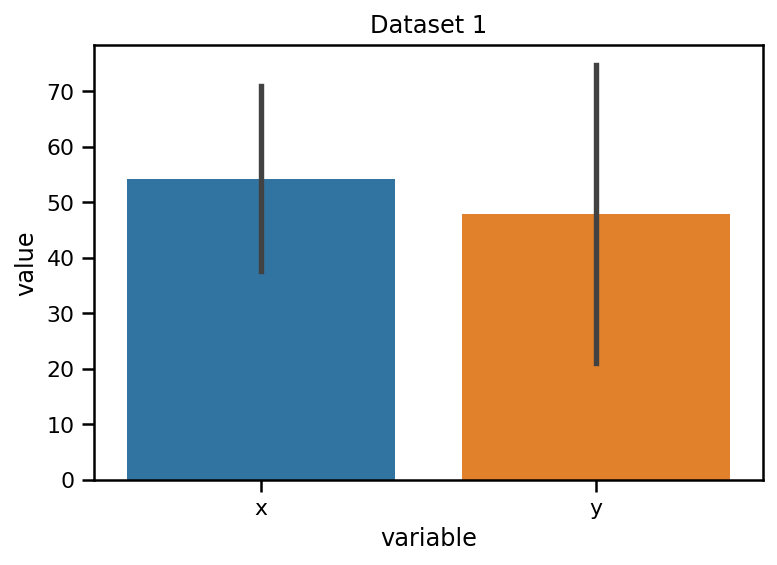

In [6]:
# Let's flip the dataframe (inverse row and columns)
df_flipped = df.melt()
# Do a barplot
sns.barplot(x="variable", y="value", data=df_flipped, ci="sd")
plt.title("Dataset 1")
plt.show()

#### Dataset 2 <a class="tocSkip"></a>

Let's consider a second dataset...

Let's load the data from `dino-data.csv`

##### Load data <a class="tocSkip"></a>

In [7]:
# Load the data
df_other = pd.read_csv(
    os.path.join("data", "dino-data.csv"),
    index_col=[0])

# Look at the top of the file
df_other

,x,y
0,55.384600,97.179500
1,51.538500,96.025600
2,46.153800,94.487200
3,42.820500,91.410300
4,40.769200,88.333300
...,...,...
137,39.487200,25.384600
138,91.282100,41.538500
139,50.000000,95.769200
140,47.948700,95.000000


In [8]:
# For both variables...
for var in ("x", "y"):
    
    # Print the means and variances for the original dataset
    print(f"Dataset 1 - Mean '{var}': {np.mean(df[var]):.1f} +/- {np.std(df[var]):.2f} STD")
print()

# For both variables...
for var in ("x", "y"):
    
    # Print the means and variances for the second dataset
    print(f"Dataset 2 - Mean '{var}': {np.mean(df_other[var]):.1f} +/- {np.std(df_other[var]):.2f} STD")

Dataset 1 - Mean 'x': 54.3 +/- 16.70 STD
Dataset 1 - Mean 'y': 47.8 +/- 26.84 STD

Dataset 2 - Mean 'x': 54.3 +/- 16.71 STD
Dataset 2 - Mean 'y': 47.8 +/- 26.84 STD


##### Visualize with a simple bareplot <a class="tocSkip"></a>

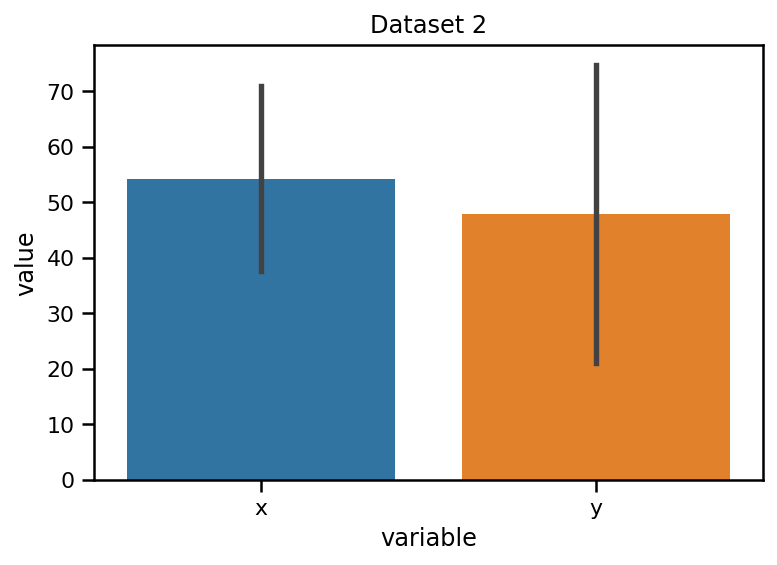

In [9]:
# Do a barplot
sns.barplot(x="variable", y="value", data=df_other.melt(), ci="sd")
plt.title("Dataset 2")
plt.show()

#### Compare by looking at the raw data <a class="tocSkip"></a>

They look quite alike, isn't it?

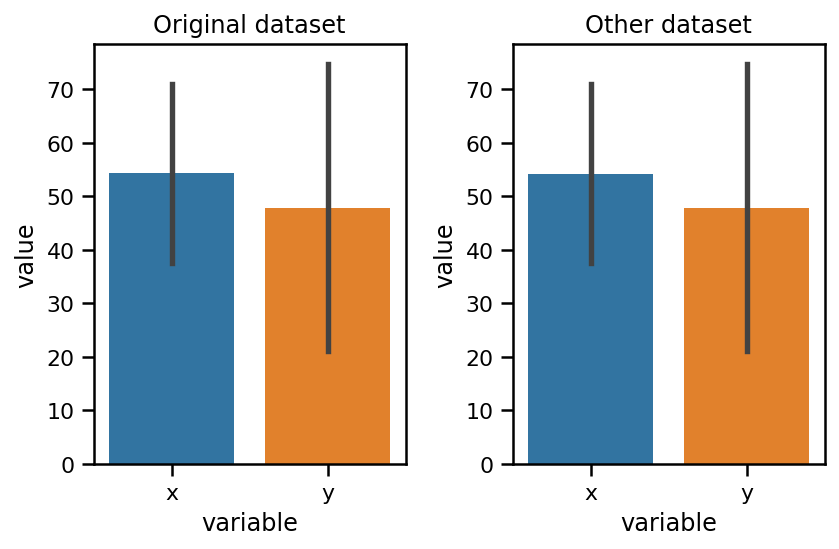

In [10]:
# Create figure and axes
fig, axes = plt.subplots(ncols=2)

# Dot the left barplot
sns.barplot(x="variable", y="value", data=df.melt(), ax=axes[0], ci="sd")
# Set the title
axes[0].set_title("Original dataset")

# Do the right barplot
sns.barplot(x="variable", y="value", data=df_other.melt(), ax=axes[1], ci="sd")
# Set the title
axes[1].set_title("Other dataset")

plt.tight_layout()
plt.show()

However...

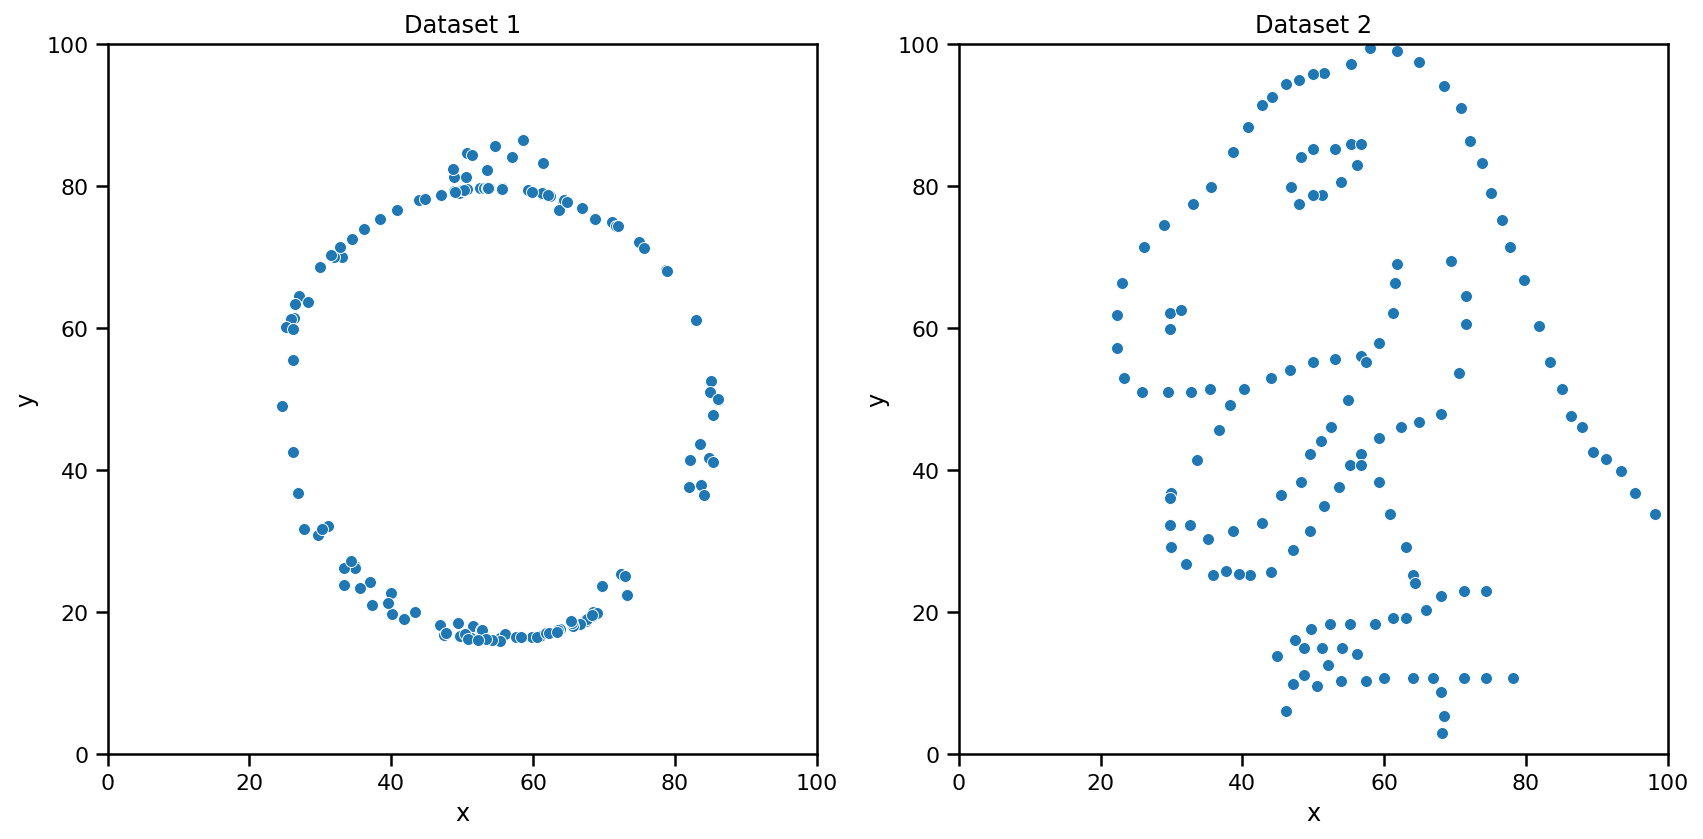

In [11]:
# Create figure and axes
fig, axes = plt.subplots(ncols=2, figsize=(12, 9))


# For both dataset
for i, (label, data) in enumerate((("Dataset 1", df), ("Dataset 2", df_other))):
    
    # Do a scatter plot
    ax = axes[i]
    sns.scatterplot(x="x", y="y", data=data, ax=ax)
    
    # Set the title
    ax.set_title(label)
    
    # Set the limits of the axes
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
    
    # Make it look square
    ax.set_aspect(1)

plt.tight_layout()
plt.show()

> The descriptive statistics are (almost identical) but the distributions are very different. **Look at your raw data first!**

A few more like this:

<img src="img/same_stats_fig5.png" width="700">

<img src="img/same_stats_fig6.png" width="600">

*Note: you can find a lot of astonishing examples in [Matejka, J., & Fitzmaurice, G. (2017, May). Same stats, different graphs: generating datasets with varied appearance and identical statistics through simulated annealing. In Proceedings of the 2017 CHI Conference on Human Factors in Computing Systems (pp. 1290-1294)](https://www.autodeskresearch.com/publications/samestats).*

## Represent the variance 

# Do not...

## Do not trust the default options

## Do not overload your figures

In [ ]:
# Recommended reading <a class="tocSkip"></a>